In [122]:
import numpy as np
import pandas as pd
import random
import copy

enki = ["A", "T", "G", "C"]

ref_list = random.choices(enki, k=10000)
reference = "".join(ref_list)
mutation = copy.copy(ref_list)

mutate_positions = [random.randint(0, 9999) for i in range(50)]
for pos in mutate_positions:
    ori = mutation[pos]
    if ori == "A":
        mutation[pos] = "T"
    elif ori == "T":
        mutation[pos] = "G"
    elif ori == "G":
        mutation[pos] = "C"
    elif ori == "C":
        mutation[pos] = "A"

mutation = "".join(mutation)

In [139]:
with open("simulation/mutations.fa", "w") as f:
    f.write(">chr1\n")
    f.write(mutation)

In [129]:
F2_genotype = [list(reference)]
F2_seq = []
F2_num = 100
for i in range(F2_num):
    recom_points = np.sort([random.randint(0, 9999) for i in range(10)])
    if random.randint(0, 9999) > 5000:
        new_geno = reference[:recom_points[0]]+mutation[recom_points[0]:recom_points[1]]+reference[recom_points[1]:recom_points[2]]+mutation[recom_points[2]:recom_points[3]]+\
        reference[recom_points[3]:recom_points[4]]+mutation[recom_points[4]:recom_points[5]]+reference[recom_points[5]:recom_points[6]]+mutation[recom_points[6]:recom_points[7]]+\
        reference[recom_points[7]:recom_points[8]]+mutation[recom_points[8]:recom_points[9]]+reference[recom_points[9]:]
    else:
        new_geno = mutation[:recom_points[0]]+reference[recom_points[0]:recom_points[1]]+mutation[recom_points[1]:recom_points[2]]+reference[recom_points[2]:recom_points[3]]+\
        mutation[recom_points[3]:recom_points[4]]+reference[recom_points[4]:recom_points[5]]+mutation[recom_points[5]:recom_points[6]]+reference[recom_points[6]:recom_points[7]]+\
        mutation[recom_points[7]:recom_points[8]]+reference[recom_points[8]:recom_points[9]]+mutation[recom_points[9]:]
    F2_genotype.append(list(new_geno))
    F2_seq.append(new_geno)

In [130]:
F2_genotype = pd.DataFrame(F2_genotype)
F2_genotype = F2_genotype.loc[:, (F2_genotype == F2_genotype.iloc[0, :]).sum() != 101]
mut_ratio = (F2_genotype == F2_genotype.iloc[0, :]).sum().values
print(list(mut_ratio).index(mut_ratio.max()))
mut_ind = list(mut_ratio).index(mut_ratio.max())
mut_ratio[list(mut_ratio).index(mut_ratio.max())]

19


66

In [131]:
with open("Cultivar.fa", "w") as f:
    f.write(">chr1\n")
    f.write(reference)

In [136]:
with open("F2_genome.fa", "w") as f:
    for i, key in enumerate((F2_genotype.iloc[1:, mut_ind] != F2_genotype.iloc[0, mut_ind]).values):
        if key:
            f.write(f">sample{i}\n")
            f.write(F2_seq[i])
            f.write("\n")

In [137]:
np.sort(mutate_positions)[mut_ind]

4369

In [ ]:
300 de wgsim -d 10 -1 20 -2 20 -N 150 CultivarB.fa Mutated_Cultivar_read.fastq Mutated_Cultivar_read2.fastq
3000   wgsim -d 100 -1 150 -2 150 -N 1500 F2_genome.fa bulked_1.fastq bulked_2.fastq

In [142]:
def simulate_fastq(F2_num):
    with open("genome/CultivarB.fa", mode="r") as f:
        ref = f.readlines()[1]
    with open("simulation/mutations.fa", mode="r") as f:
        mut = f.readlines()[1]

    F2_genotype = [list(reference)]
    F2_seq = []
    for i in range(F2_num):
        recom_points = np.sort([random.randint(0, 9999) for i in range(10)])
        if random.randint(0, 9999) > 5000:
            new_geno = reference[:recom_points[0]]+mutation[recom_points[0]:recom_points[1]]+reference[recom_points[1]:recom_points[2]]+mutation[recom_points[2]:recom_points[3]]+\
            reference[recom_points[3]:recom_points[4]]+mutation[recom_points[4]:recom_points[5]]+reference[recom_points[5]:recom_points[6]]+mutation[recom_points[6]:recom_points[7]]+\
            reference[recom_points[7]:recom_points[8]]+mutation[recom_points[8]:recom_points[9]]+reference[recom_points[9]:]
        else:
            new_geno = mutation[:recom_points[0]]+reference[recom_points[0]:recom_points[1]]+mutation[recom_points[1]:recom_points[2]]+reference[recom_points[2]:recom_points[3]]+\
            mutation[recom_points[3]:recom_points[4]]+reference[recom_points[4]:recom_points[5]]+mutation[recom_points[5]:recom_points[6]]+reference[recom_points[6]:recom_points[7]]+\
            mutation[recom_points[7]:recom_points[8]]+reference[recom_points[8]:recom_points[9]]+mutation[recom_points[9]:]
        F2_genotype.append(list(new_geno))
        F2_seq.append(new_geno)
        
        F2_genotype = pd.DataFrame(F2_genotype)
        F2_genotype = F2_genotype.loc[:, (F2_genotype == F2_genotype.iloc[0, :]).sum() != F2_num+1]
        
        with open("F2_genome.fa", "w") as f:
            for i, key in enumerate((F2_genotype.iloc[1:, 19] != F2_genotype.iloc[0, 19]).values):
                if key:
                    f.write(f">sample{i}\n")
                    f.write(F2_seq[i])
                    f.write("\n")

# QTLseq

(array([ 2.,  2.,  8.,  5., 10.,  9.,  8.,  5.,  0.,  1.]),
 array([-12.81317349,  -9.88760653,  -6.96203957,  -4.03647261,
         -1.11090565,   1.81466131,   4.74022827,   7.66579523,
         10.59136219,  13.51692915,  16.44249611]),
 <BarContainer object of 10 artists>)

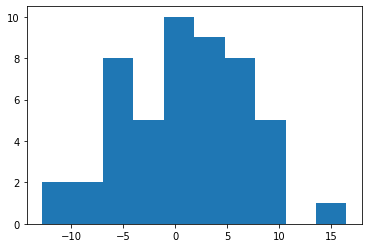

In [419]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigma = 7
n_sample = 50
effects = np.random.normal(mu, sigma, n_sample)
plt.hist(effects)

In [446]:
effects[32] = -30
effects[44] = 70
# effects = effects+1
effects
# -1.37204775e+01
# 1.30497216e+01

array([ 1.64656347e-01,  1.85102742e+00,  4.67044862e+00,  7.66562094e+00,
       -2.56115417e+00,  4.38918289e+00,  7.80757081e+00,  1.00220190e+00,
        1.22829847e+00, -3.11754555e+00, -5.40511802e-01,  6.18824690e+00,
        4.41199836e+00,  1.32767573e+00,  1.69444118e+00,  8.41450007e+00,
       -5.34162106e+00,  6.48760733e+00, -2.02808097e+00, -5.19645524e+00,
        8.13778906e+00,  2.20353186e+00,  6.31486176e+00,  6.36419116e+00,
        2.00877506e+00,  6.67009046e+00,  5.23403746e+00,  1.31649738e+00,
        8.40394596e-01, -1.61565807e-01, -5.82085552e+00, -5.46691807e+00,
       -3.00000000e+01, -4.31698143e+00, -4.77843938e+00, -5.40496901e+00,
       -4.00759462e+00, -3.50813322e+00, -7.48831032e+00, -6.63627070e+00,
        9.45289997e+00,  7.30365077e+00,  3.53991263e+00,  3.90794702e+00,
        7.00000000e+01, -8.76222436e+00, -1.77703337e-02,  8.26826546e+00,
        3.94445354e+00, -1.11201989e+01])

In [434]:
print(np.sort(mutate_positions)[32])
print(np.sort(mutate_positions)[44])

6115
8790


In [425]:
import numpy as np
import pandas as pd
import random
import copy

enki = ["A", "T", "G", "C"]

ref_list = random.choices(enki, k=10000)
reference = "".join(ref_list)
mutation = copy.copy(ref_list)

mutate_positions = [random.randint(0, 9999) for i in range(50)]
for pos in mutate_positions:
    ori = mutation[pos]
    if ori == "A":
        mutation[pos] = "T"
    elif ori == "T":
        mutation[pos] = "G"
    elif ori == "G":
        mutation[pos] = "C"
    elif ori == "C":
        mutation[pos] = "A"

mutation = "".join(mutation)

In [426]:
with open("genome2/CultivarB.fa", "w") as f:
    f.write(">chr1\n")
    f.write(reference)

In [447]:
F2_genotype = [list(reference)]
F2_seq = []
F2_num = 100
for i in range(F2_num):
    recom_points = np.sort([random.randint(0, 9999) for i in range(10)])
    if random.randint(0, 9999) > 5000:
        new_geno = reference[:recom_points[0]]+mutation[recom_points[0]:recom_points[1]]+reference[recom_points[1]:recom_points[2]]+mutation[recom_points[2]:recom_points[3]]+\
        reference[recom_points[3]:recom_points[4]]+mutation[recom_points[4]:recom_points[5]]+reference[recom_points[5]:recom_points[6]]+mutation[recom_points[6]:recom_points[7]]+\
        reference[recom_points[7]:recom_points[8]]+mutation[recom_points[8]:recom_points[9]]+reference[recom_points[9]:]
    else:
        new_geno = mutation[:recom_points[0]]+reference[recom_points[0]:recom_points[1]]+mutation[recom_points[1]:recom_points[2]]+reference[recom_points[2]:recom_points[3]]+\
        mutation[recom_points[3]:recom_points[4]]+reference[recom_points[4]:recom_points[5]]+mutation[recom_points[5]:recom_points[6]]+reference[recom_points[6]:recom_points[7]]+\
        mutation[recom_points[7]:recom_points[8]]+reference[recom_points[8]:recom_points[9]]+mutation[recom_points[9]:]
    F2_genotype.append(list(new_geno))
    F2_seq.append(new_geno)
F2_genotype = pd.DataFrame(F2_genotype)
F2_genotype = F2_genotype.loc[:, (F2_genotype == F2_genotype.iloc[0, :]).sum() != 101]

(array([ 1.,  0.,  3.,  4.,  9.,  6.,  6., 10.,  5., 15.,  8.,  5.,  4.,
         2.,  9.,  4.,  5.,  2.,  1.,  1.]),
 array([ 35.04610595,  46.21299901,  57.37989206,  68.54678511,
         79.71367817,  90.88057122, 102.04746428, 113.21435733,
        124.38125038, 135.54814344, 146.71503649, 157.88192955,
        169.0488226 , 180.21571566, 191.38260871, 202.54950176,
        213.71639482, 224.88328787, 236.05018093, 247.21707398,
        258.38396703]),
 <BarContainer object of 20 artists>)

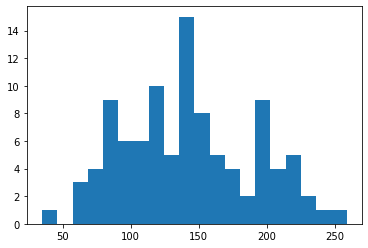

In [448]:
F2_genotype_TF = F2_genotype != F2_genotype.iloc[0, :]
phenotypes = []
for i in range(F2_num):
    phenotypes.append(100 + sum(effects[F2_genotype_TF.iloc[i+1, :].values]))
plt.hist(phenotypes, bins=20)

In [449]:
with open("low_10_F2_genome.fa", "w") as f:
    for i in np.argsort(phenotypes)[:10]:
        f.write(f">sample{i}\n")
        f.write(F2_seq[i])
        f.write("\n")
        
with open("high_10_F2_genome.fa", "w") as f:
    for i in np.argsort(phenotypes)[-10:]:
        f.write(f">sample{i}\n")
        f.write(F2_seq[i])
        f.write("\n")

In [450]:
import os
os.system(f'wgsim -e 0 -r 0 -R 0 -X 0 -d 300 -1 150 -2 150 -N 500 low_10_F2_genome.fa reads2/low_bulked_read1.fastq reads2/low_bulked_read2.fastq')
os.system(f'wgsim -e 0 -r 0 -R 0 -X 0 -d 300 -1 150 -2 150 -N 500 high_10_F2_genome.fa reads2/high_bulked_read1.fastq reads2/high_bulked_read2.fastq')

0